In [1]:
# Load in libraries
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import numpy as np
from torch.utils.data import DataLoader
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train = '/Users/jaxen1/Shared/C/Machine Learning/project2/Untitled/MachineLearningProject3/images/train'
razorback_transforms = transforms.Compose([
    transforms.Resize(128),              # resize shortest side to 128, keep aspect ratio
    transforms.CenterCrop([128, 128]),   # crop to square
    transforms.RandomHorizontalFlip(),
    #transforms.ToTensor()
])

train_dataset = ImageFolder(root=train, transform = razorback_transforms)
print('Train set:', len(train_dataset))


Train set: 14


IndexError: list index out of range

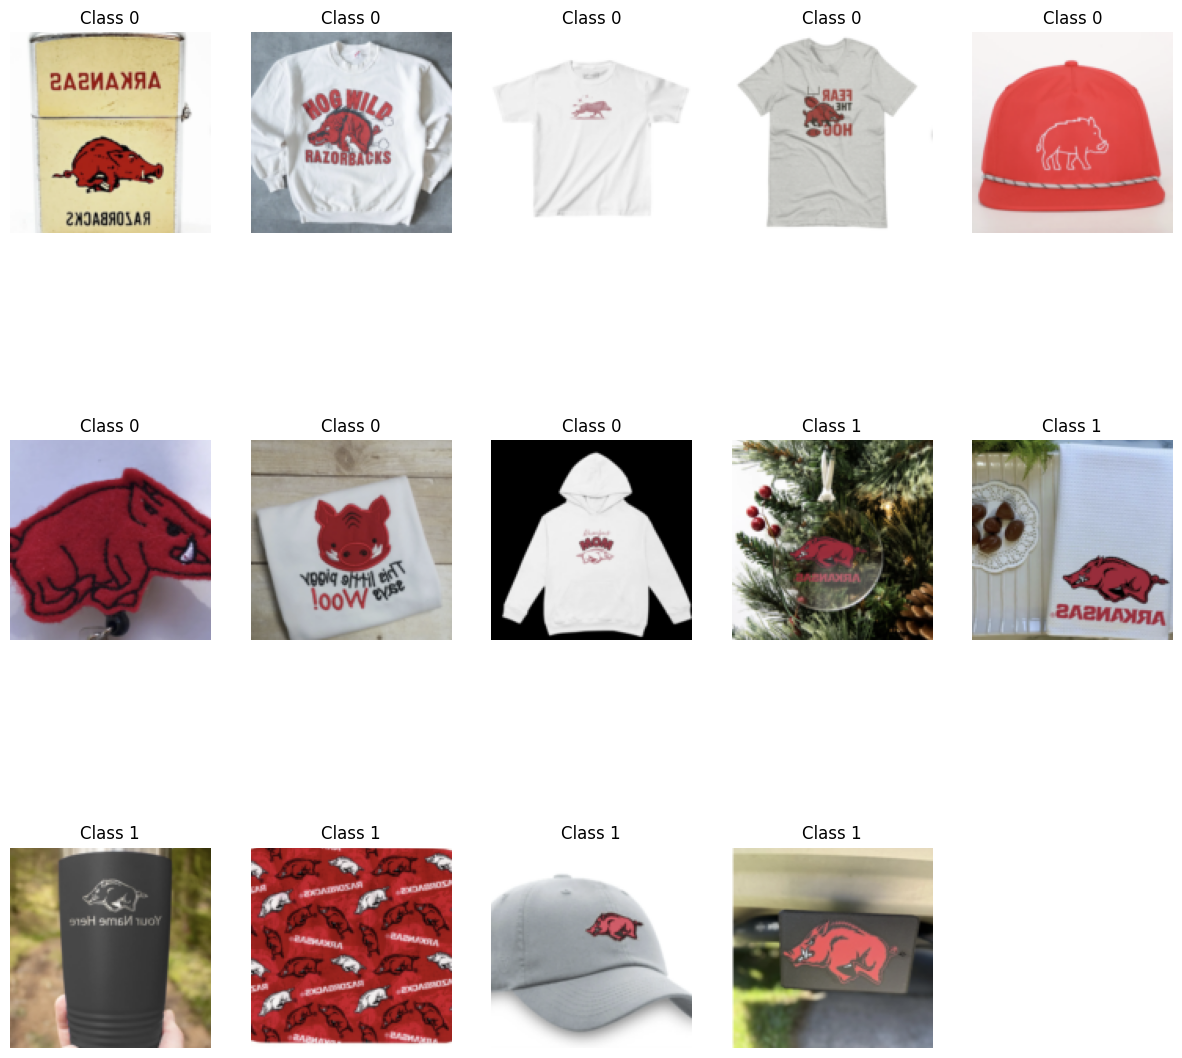

In [3]:
# Fix randomness for reproducibility
torch.manual_seed(17)

# Plot 15 images
fig = plt.figure(figsize=(15, 15))
for i in range(15):
    img, label = train_dataset[i]   # get image and label
    ax = fig.add_subplot(3, 5, i+1) # 3 rows × 5 columns grid
    ax.imshow(img)                  # show the PIL image
    ax.axis("off")
    ax.set_title(f"Class {label}")

plt.tight_layout()
plt.show()


In [5]:
transformsToTensor = transforms.Compose([
    transforms.Resize(128),              # resize shortest side to 128, keep aspect ratio
    transforms.CenterCrop([128, 128]),   # crop to square
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])


train_dataset = ImageFolder(root=train, transform = transformsToTensor)
print('Train set:', len(train_dataset))

Train set: 14


In [6]:
# box 5
# Create data loa
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
torch.manual_seed(17)



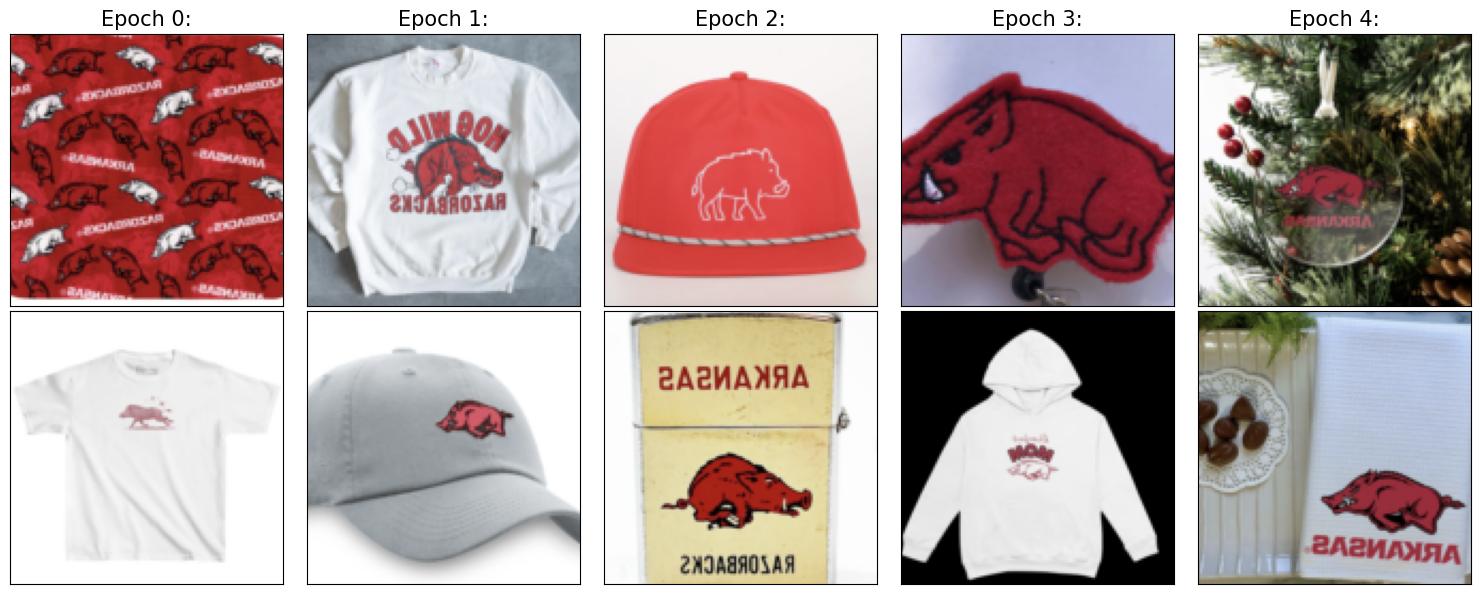

In [8]:
# Visalize how data is samplesd in different epochs
fig = plt.figure(figsize=(15, 6))

num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(train_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epoch {j}:', size=15)
    ax.imshow(img.permute(1, 2, 0))

    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j + 6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))

plt.tight_layout()
plt.show()

In [ ]:
# # box 7 explain overall
# # what does this do
"""We need to create a train and test sets for our own dataset"""
# celeba_valid_dataset = torchvision.datasets.CelebA(image_path,
#                                                    split='valid',
#                                                    target_type='attr',
#                                                    download=False,
#                                                    transform=transform,
#                                                    target_transform=get_smile)

# # what does this do
# celeba_test_dataset = torchvision.datasets.CelebA(image_path,
#                                                    split='test',
#                                                    target_type='attr',
#                                                    download=False,
#                                                    transform=transform,
#                                                    target_transform=get_smile)

In [ ]:
# box 8
# what does this do
from torch.utils.data import Subset

# what does this do
# why do did we do this?
celeba_train_dataset = Subset(celeba_train_dataset, torch.arange(16000))

# what does this do
# why do did we do this?
celeba_valid_dataset = Subset(celeba_valid_dataset, torch.arange(1000))

print('Train set:', len(celeba_train_dataset))
print('Validation set:', len(celeba_valid_dataset))

In [ ]:
# box 9 explain overall
batch_size = 32

torch.manual_seed(17)
train_dl = DataLoader(celeba_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset, batch_size, shuffle=False)
test_dl = DataLoader(celeba_test_dataset, batch_size, shuffle=False)

In [ ]:
# box 10 explain what this does overall and what it creates
model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout1', nn.Dropout(p=0.5))

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout2', nn.Dropout(p=0.5))

model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1))
model.add_module('relu3', nn.ReLU())
model.add_module('pool3', nn.MaxPool2d(kernel_size=2))

model.add_module('conv4', nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1))
model.add_module('relu4', nn.ReLU())

In [ ]:
# box 11 explain overall and why we did this

x = torch.ones((4, 3, 64, 64))
model(x).shape

In [ ]:
# box 12
# what does this do. Can we exclude? Hint:  look at chapter
model.add_module('pool4', nn.AvgPool2d(kernel_size=8))

# what does this do
model.add_module('flatten', nn.Flatten())

# what does this do..does it provide expected size
x = torch.ones((4, 3, 64, 64))
model(x).shape

In [ ]:
# box 13
# what does this do
model.add_module('fc', nn.Linear(256, 1))

# what does this do
model.add_module('sigmoid', nn.Sigmoid())

In [ ]:
# box 14 explain overall....does it provide expected size?
x = torch.ones((4, 3, 64, 64))
model(x).shape

In [ ]:
# box 15 explain what this does
model

In [ ]:
# box 16
# what does this do
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# what does this do
model = model.to(device)

In [ ]:
# box 17
# what does this do
loss_fn = nn.BCELoss()

# what does this do
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# box 18
# explain overall
def train(model, num_epochs, train_dl, valid_dl):

    # explain this group
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    # what does this do
    for epoch in range(num_epochs):

        # what does this do
        model.train()

        # what does this do
        for x_batch, y_batch in train_dl:
            # what does this do
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            # what does this do
            pred = model(x_batch)[:, 0]

            # what does this do
            loss = loss_fn(pred, y_batch.float())

            # what does this do
            loss.backward()

            # what does this do
            optimizer.step()

            # what does this do
            optimizer.zero_grad()

            # what does this group do
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        # what does this group do
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        # what does this do
        model.eval()

        # what does this do
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = ((pred>=0.5).float() == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')

    # what does this function returns (do not just state the variables...describe what they represent like in a docustring)
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid


In [ ]:
# box 19
torch.manual_seed(17)

# original example had 30 but it took ~1 hour to run 15 epochs
num_epochs = 1

# what does this do
hist = train(model, num_epochs, train_dl, valid_dl)

In [ ]:
# box 20 describe overall...include if you are happy with results and what you could do to improve if it needed it
x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_17.png', dpi=300)
plt.show()

In [ ]:
# box 21
accuracy_test = 0

# what does this do
model.eval()

# what does this do
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        pred = model(x_batch)[:, 0]
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_test += is_correct.sum().cpu()

accuracy_test /= len(test_dl.dataset)

print(f'Test accuracy: {accuracy_test:.4f}')

In [ ]:
# box 22 desribe overall and why you would do this and how it can help you
pred = model(x_batch)[:, 0] * 100

fig = plt.figure(figsize=(15, 7))
for j in range(10, 20):
    ax = fig.add_subplot(2, 5, j-10+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(x_batch[j].cpu().permute(1, 2, 0))
    if y_batch[j] == 1:
        label = 'Smile'
    else:
        label = 'Not Smile'
    ax.text(
        0.5, -0.15,
        f'GT: {label:s}\nPr(Smile)={pred[j]:.0f}%',
        size=16,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

#plt.savefig('figures/figures-14_18.png', dpi=300)
plt.show()

In [ ]:
# box 23

# what does this do
import os

# what does this do
if not os.path.exists('models'):
    os.mkdir('models')

path = 'models/celeba-cnn.ph'

# what does this do
torch.save(model, path)

In [ ]:
# box 24
path = 'models/celeba-cnn.ph'

# what does this do
loaded_full_model = torch.load(path, weights_only=False)

# what does this do
loaded_full_model.eval()

In [ ]:
# box 25

from PIL import Image
image_path = 'FILENAME.jpg'

# what does this do
img = Image.open(image_path).convert('RGB')

# what does this do
img_tensor = transform(img).unsqueeze(0)

# what does this do
with torch.no_grad():
    # what does this do
    logit = loaded_full_model(img_tensor)

    # what does this do
    probability = torch.sigmoid(logit).item()

# what does this group do
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Image to Classify: {os.path.basename(image_path)}")
plt.axis('off')
plt.show()
print(f"Classification Result:")
print(f"pr(Smile): {probability:.4f}")

# what does this do
label = "SMILE" if probability >= 0.5 else "NOT SMILING"
print(f"Predicted Class: {label}")